In [1]:
from pathlib import Path


_artifact_path = "../artifacts/05_06_2025_15_10_06/data_ingestion"
root_dir = Path(f"{_artifact_path}/data")
train_path = root_dir / "train"
test_path = root_dir / "test"

train_path, test_path

(PosixPath('../artifacts/05_06_2025_15_10_06/data_ingestion/data/train'),
 PosixPath('../artifacts/05_06_2025_15_10_06/data_ingestion/data/test'))

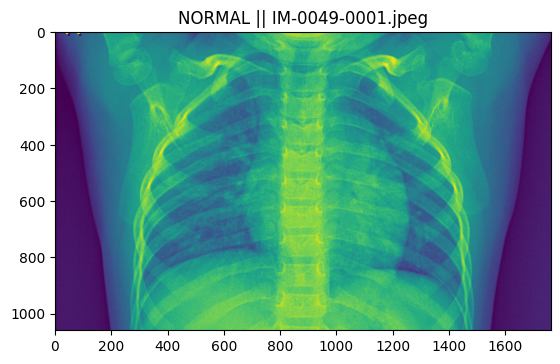

In [2]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt


train_data = ImageFolder(root=train_path)
a, _ = train_data.samples[35] # idx

plt.title(f"{Path(a).parts[-2]} || {Path(a).name}")
plt.imshow(plt.imread(a))
plt.show()

In [3]:
from typing import List


BRIGHTNESS:float = 0.1
CONTRAST:float = 0.1
SATURATION:float = 0.1
HUE:float = 0.1
RESIZE:int = 224
CENTER_CROP:int = 224
RANDOM_ROTATION:int = 10
NORMALIZE_LIST_1:List[int] = [0.485, 0.456, 0.406]
NORMALIZE_LIST_2:List[int] = [0.229, 0.224, 0.225]
BATCH_SIZE:int = 2
SHUFFLE:bool = False
PIN_MEMORY:bool = True

In [4]:
from torchvision import transforms


train_transforms = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.CenterCrop(CENTER_CROP),
    transforms.ColorJitter(
        brightness=BRIGHTNESS,
        contrast=CONTRAST,
        saturation=SATURATION,
        hue=HUE
    ),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(RANDOM_ROTATION),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=NORMALIZE_LIST_1,
        std=NORMALIZE_LIST_2
    )
])

test_transforms = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.CenterCrop(CENTER_CROP),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=NORMALIZE_LIST_1,
        std=NORMALIZE_LIST_2
    )
])


In [5]:
from torchvision.datasets import ImageFolder


train_data = ImageFolder(root=train_path, transform=train_transforms)
test_data = ImageFolder(root=test_path, transform=test_transforms)

classes = train_data.classes

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 212
     Root location: ../artifacts/05_06_2025_15_10_06/data_ingestion/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 60
     Root location: ../artifacts/05_06_2025_15_10_06/data_ingestion/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
          

In [6]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
    pin_memory=PIN_MEMORY)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
    pin_memory=PIN_MEMORY
)


In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )

        self.pool_1 = nn.MaxPool2d(2, 2)

        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )

        self.pool_2 = nn.MaxPool2d(2, 2)

        self.conv_3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=1, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.pool_3 = nn.MaxPool2d(2, 2)

        self.conv_4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )

        self.conv_5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=1, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )

        self.conv_6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.conv_7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=1, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.conv_8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )

        self.conv_9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )

        self.gap = nn.Sequential(nn.AvgPool2d(kernel_size=4))

        self.conv_out = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=2, kernel_size=4, padding=0, bias=True)
        )

    def forward(self, x):
        x = self.pool_3(self.conv_3(
                self.pool_2(self.conv_2(
                    self.pool_1(self.conv_1(x))
                ))
            ))
        
        x = self.conv_9(self.conv_8(
                self.conv_7(self.conv_6(
                    self.conv_5(self.conv_4(x))
                ))
            ))
        
        x = self.conv_out(self.gap(x))
        
        return F.log_softmax(x.view(-1, 2), dim=1)
    

In [31]:
import torch

# print(torch.cuda.is_available())
# print(torch.cuda.device_count())
# print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA device found")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
from torchinfo import summary


model = Net().to(device)
summary(model,
        input_size=(BATCH_SIZE, 3, RESIZE, RESIZE), # (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Net (Net)                                [2, 3, 224, 224]     [2, 2]               --                   True
├─Sequential (conv_1)                    [2, 3, 224, 224]     [2, 8, 222, 222]     --                   True
│    └─Conv2d (0)                        [2, 3, 224, 224]     [2, 8, 222, 222]     224                  True
│    └─ReLU (1)                          [2, 8, 222, 222]     [2, 8, 222, 222]     --                   --
│    └─BatchNorm2d (2)                   [2, 8, 222, 222]     [2, 8, 222, 222]     16                   True
├─MaxPool2d (pool_1)                     [2, 8, 222, 222]     [2, 8, 111, 111]     --                   --
├─Sequential (conv_2)                    [2, 8, 111, 111]     [2, 20, 109, 109]    --                   True
│    └─Conv2d (0)                        [2, 8, 111, 111]     [2, 20, 109, 109]    1,460                True
│    └─ReLU (1)   

In [10]:
train_losses = []
train_accuracy = []

In [11]:
from torch.nn import Module
from torch.optim import Optimizer
from torch.utils.data import DataLoader
import torch.nn.functional as F

from tqdm import tqdm


def train(model:Module, train_loader:DataLoader, optimizer:Optimizer, device:str):
    model.train()

    pbar = tqdm(train_loader)
    correct = 0
    processed = 0

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        y_pred = model(data)
        loss = F.nll_loss(y_pred, target) # negative log likelihood loss

        train_losses.append(loss)

        loss.backward()
        optimizer.step()

        #
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        
        pbar.set_description(
            desc=f"Loss={loss.item()} | Batch ID={batch_idx} | Accuracy={100.0 * correct / processed:0.2f}"
        )

        train_accuracy.append(100.0 * correct / processed)


In [12]:
test_losses = []
test_accuracy = []

In [13]:
from torch.nn import Module
from torch.utils.data import DataLoader
import torch.nn.functional as F


def test(model:Module, test_loader:DataLoader, device:str):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.inference_mode():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += F.nll_loss(output, target, reduction="sum").item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        
        print(f"Average Loss={test_loss:.4f} | Accuracy={100.0 * correct / len(test_loader.dataset)}")
        
        test_accuracy.append(100.0 * correct / len(test_loader.dataset))


In [14]:
from torch.optim.lr_scheduler import StepLR


model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)
epochs = 100

# print("Current Learning Rate: ", optimizer.state_dict()["param_groups"][0]["lr"])

def do_train(model):
    for epoch in range(epochs):
        print("Epoch: ", epoch)

        train(model=model, train_loader=train_dataloader, optimizer=optimizer, device=device)
        scheduler.step()

        test(model=model, test_loader=test_dataloader, device=device)

do_train(model)

Epoch:  0


Loss=0.06035304814577103 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:03<00:00, 33.91it/s] 


Average Loss=3.2620 | Accuracy=46.666666666666664
Epoch:  1


Loss=0.02422172576189041 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.71it/s] 


Average Loss=1.9909 | Accuracy=48.333333333333336
Epoch:  2


Loss=0.01565266028046608 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s]  


Average Loss=2.4763 | Accuracy=48.333333333333336
Epoch:  3


Loss=0.024097025394439697 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:03<00:00, 35.26it/s] 


Average Loss=1.9066 | Accuracy=50.0
Epoch:  4


Loss=0.014074494130909443 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.41it/s] 


Average Loss=1.8757 | Accuracy=50.0
Epoch:  5


Loss=0.023621816188097 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 35.92it/s]   


Average Loss=2.6624 | Accuracy=46.666666666666664
Epoch:  6


Loss=0.058764055371284485 | Batch ID=105 | Accuracy=93.40: 100%|██████████| 106/106 [00:03<00:00, 35.31it/s]


Average Loss=1.1937 | Accuracy=51.666666666666664
Epoch:  7


Loss=0.1525278091430664 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 36.07it/s]  


Average Loss=1.1803 | Accuracy=51.666666666666664
Epoch:  8


Loss=0.1493837535381317 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s] 


Average Loss=1.7779 | Accuracy=50.0
Epoch:  9


Loss=0.045893650501966476 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.39it/s]


Average Loss=1.4668 | Accuracy=50.0
Epoch:  10


Loss=0.07002334296703339 | Batch ID=105 | Accuracy=92.92: 100%|██████████| 106/106 [00:02<00:00, 35.97it/s] 


Average Loss=1.1312 | Accuracy=53.333333333333336
Epoch:  11


Loss=0.07215379178524017 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.90it/s]


Average Loss=1.3241 | Accuracy=48.333333333333336
Epoch:  12


Loss=0.09896185994148254 | Batch ID=105 | Accuracy=90.09: 100%|██████████| 106/106 [00:03<00:00, 35.15it/s] 


Average Loss=0.8960 | Accuracy=51.666666666666664
Epoch:  13


Loss=0.08974398672580719 | Batch ID=105 | Accuracy=92.92: 100%|██████████| 106/106 [00:02<00:00, 35.71it/s] 


Average Loss=0.8844 | Accuracy=55.0
Epoch:  14


Loss=0.11260154843330383 | Batch ID=105 | Accuracy=91.98: 100%|██████████| 106/106 [00:02<00:00, 35.89it/s] 


Average Loss=0.9485 | Accuracy=53.333333333333336
Epoch:  15


Loss=0.14305172860622406 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.62it/s] 


Average Loss=1.2851 | Accuracy=48.333333333333336
Epoch:  16


Loss=0.049963001161813736 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.87it/s]


Average Loss=1.0133 | Accuracy=53.333333333333336
Epoch:  17


Loss=0.025744838640093803 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.76it/s]


Average Loss=0.9929 | Accuracy=51.666666666666664
Epoch:  18


Loss=0.1236514151096344 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s] 


Average Loss=0.7237 | Accuracy=66.66666666666667
Epoch:  19


Loss=0.11788590252399445 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 36.16it/s] 


Average Loss=0.7006 | Accuracy=56.666666666666664
Epoch:  20


Loss=0.023140259087085724 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.81it/s] 


Average Loss=0.8483 | Accuracy=56.666666666666664
Epoch:  21


Loss=0.10239199548959732 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:03<00:00, 35.27it/s]  


Average Loss=0.7818 | Accuracy=50.0
Epoch:  22


Loss=0.04579591751098633 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 35.91it/s] 


Average Loss=0.8367 | Accuracy=55.0
Epoch:  23


Loss=0.036866724491119385 | Batch ID=105 | Accuracy=98.58: 100%|██████████| 106/106 [00:02<00:00, 35.83it/s]


Average Loss=0.8126 | Accuracy=51.666666666666664
Epoch:  24


Loss=0.04463924467563629 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.46it/s] 


Average Loss=0.5451 | Accuracy=75.0
Epoch:  25


Loss=0.08554819971323013 | Batch ID=105 | Accuracy=98.58: 100%|██████████| 106/106 [00:03<00:00, 35.19it/s] 


Average Loss=0.5120 | Accuracy=76.66666666666667
Epoch:  26


Loss=0.043441325426101685 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.66it/s] 


Average Loss=0.6088 | Accuracy=63.333333333333336
Epoch:  27


Loss=0.2219650149345398 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.79it/s]  


Average Loss=0.6409 | Accuracy=58.333333333333336
Epoch:  28


Loss=0.05635419487953186 | Batch ID=105 | Accuracy=98.58: 100%|██████████| 106/106 [00:02<00:00, 35.86it/s] 


Average Loss=0.5247 | Accuracy=80.0
Epoch:  29


Loss=0.30834415555000305 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.68it/s] 


Average Loss=0.5468 | Accuracy=76.66666666666667
Epoch:  30


Loss=0.05617499724030495 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.97it/s]


Average Loss=0.4651 | Accuracy=85.0
Epoch:  31


Loss=0.3730558156967163 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.85it/s]  


Average Loss=0.4151 | Accuracy=85.0
Epoch:  32


Loss=0.04680422320961952 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.90it/s] 


Average Loss=0.3715 | Accuracy=85.0
Epoch:  33


Loss=0.05462883040308952 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.63it/s]  


Average Loss=0.4395 | Accuracy=86.66666666666667
Epoch:  34


Loss=0.344122976064682 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:03<00:00, 35.05it/s]    


Average Loss=0.3486 | Accuracy=88.33333333333333
Epoch:  35


Loss=0.05199285224080086 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.91it/s] 


Average Loss=0.3574 | Accuracy=86.66666666666667
Epoch:  36


Loss=0.8138946890830994 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.11it/s]  


Average Loss=0.3227 | Accuracy=88.33333333333333
Epoch:  37


Loss=0.5265750885009766 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.57it/s]   


Average Loss=0.3386 | Accuracy=90.0
Epoch:  38


Loss=0.12399184703826904 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.58it/s] 


Average Loss=0.3330 | Accuracy=90.0
Epoch:  39


Loss=0.033175524324178696 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.93it/s]


Average Loss=0.3268 | Accuracy=90.0
Epoch:  40


Loss=0.04182456433773041 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 36.18it/s] 


Average Loss=0.3322 | Accuracy=88.33333333333333
Epoch:  41


Loss=0.11325783282518387 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.70it/s]  


Average Loss=0.3149 | Accuracy=90.0
Epoch:  42


Loss=0.2037038803100586 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.70it/s]  


Average Loss=0.2748 | Accuracy=91.66666666666667
Epoch:  43


Loss=0.056042421609163284 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.37it/s]


Average Loss=0.2784 | Accuracy=88.33333333333333
Epoch:  44


Loss=0.18871954083442688 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.66it/s] 


Average Loss=0.2498 | Accuracy=90.0
Epoch:  45


Loss=0.20790621638298035 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.45it/s] 


Average Loss=0.2829 | Accuracy=90.0
Epoch:  46


Loss=0.17453773319721222 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.86it/s] 


Average Loss=0.2693 | Accuracy=91.66666666666667
Epoch:  47


Loss=1.6084164381027222 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.81it/s]  


Average Loss=0.2779 | Accuracy=93.33333333333333
Epoch:  48


Loss=0.2450113445520401 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.90it/s]  


Average Loss=0.2478 | Accuracy=91.66666666666667
Epoch:  49


Loss=0.475583553314209 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.80it/s]   


Average Loss=0.2506 | Accuracy=91.66666666666667
Epoch:  50


Loss=0.06556738913059235 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 35.87it/s] 


Average Loss=0.2588 | Accuracy=88.33333333333333
Epoch:  51


Loss=0.5670775175094604 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.56it/s]   


Average Loss=0.2552 | Accuracy=90.0
Epoch:  52


Loss=0.0735078826546669 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.90it/s]  


Average Loss=0.2608 | Accuracy=90.0
Epoch:  53


Loss=0.15396666526794434 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.92it/s] 


Average Loss=0.2800 | Accuracy=88.33333333333333
Epoch:  54


Loss=0.05807395651936531 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.34it/s]  


Average Loss=0.2592 | Accuracy=91.66666666666667
Epoch:  55


Loss=0.06428079307079315 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 36.17it/s] 


Average Loss=0.2560 | Accuracy=91.66666666666667
Epoch:  56


Loss=0.06933452188968658 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 36.02it/s] 


Average Loss=0.2577 | Accuracy=90.0
Epoch:  57


Loss=0.10732792317867279 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.80it/s] 


Average Loss=0.2647 | Accuracy=91.66666666666667
Epoch:  58


Loss=0.22777602076530457 | Batch ID=105 | Accuracy=98.58: 100%|██████████| 106/106 [00:02<00:00, 36.16it/s] 


Average Loss=0.2498 | Accuracy=90.0
Epoch:  59


Loss=0.058224376291036606 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 36.26it/s]


Average Loss=0.2585 | Accuracy=88.33333333333333
Epoch:  60


Loss=0.06682627648115158 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.94it/s]  


Average Loss=0.2357 | Accuracy=91.66666666666667
Epoch:  61


Loss=0.05267379432916641 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 36.36it/s] 


Average Loss=0.2381 | Accuracy=90.0
Epoch:  62


Loss=0.11463576555252075 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 36.06it/s] 


Average Loss=0.2509 | Accuracy=90.0
Epoch:  63


Loss=0.45587170124053955 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 36.00it/s] 


Average Loss=0.2608 | Accuracy=91.66666666666667
Epoch:  64


Loss=0.3698197901248932 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.95it/s]   


Average Loss=0.2334 | Accuracy=93.33333333333333
Epoch:  65


Loss=0.12454322725534439 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 36.10it/s] 


Average Loss=0.2450 | Accuracy=91.66666666666667
Epoch:  66


Loss=0.24101287126541138 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 36.08it/s] 


Average Loss=0.2434 | Accuracy=91.66666666666667
Epoch:  67


Loss=0.15063662827014923 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.85it/s]  


Average Loss=0.2416 | Accuracy=91.66666666666667
Epoch:  68


Loss=0.7040269374847412 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 36.05it/s] 


Average Loss=0.2511 | Accuracy=90.0
Epoch:  69


Loss=0.23672661185264587 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 36.03it/s] 


Average Loss=0.2585 | Accuracy=90.0
Epoch:  70


Loss=0.1800934374332428 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 35.89it/s]  


Average Loss=0.2790 | Accuracy=88.33333333333333
Epoch:  71


Loss=0.07146205753087997 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 36.14it/s] 


Average Loss=0.2590 | Accuracy=91.66666666666667
Epoch:  72


Loss=0.6681620478630066 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.54it/s]   


Average Loss=0.2588 | Accuracy=90.0
Epoch:  73


Loss=0.07308979332447052 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.53it/s]  


Average Loss=0.2377 | Accuracy=91.66666666666667
Epoch:  74


Loss=0.038262564688920975 | Batch ID=105 | Accuracy=98.58: 100%|██████████| 106/106 [00:02<00:00, 36.09it/s]


Average Loss=0.2552 | Accuracy=90.0
Epoch:  75


Loss=0.5621676445007324 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.88it/s]  


Average Loss=0.2470 | Accuracy=91.66666666666667
Epoch:  76


Loss=0.0748940259218216 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.99it/s]  


Average Loss=0.2489 | Accuracy=88.33333333333333
Epoch:  77


Loss=0.055730219930410385 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.73it/s]


Average Loss=0.2614 | Accuracy=90.0
Epoch:  78


Loss=0.046821609139442444 | Batch ID=105 | Accuracy=98.58: 100%|██████████| 106/106 [00:02<00:00, 35.42it/s] 


Average Loss=0.2607 | Accuracy=91.66666666666667
Epoch:  79


Loss=0.19499610364437103 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.41it/s]  


Average Loss=0.2662 | Accuracy=90.0
Epoch:  80


Loss=1.0468559265136719 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.41it/s]  


Average Loss=0.2506 | Accuracy=91.66666666666667
Epoch:  81


Loss=0.8015722632408142 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.76it/s]   


Average Loss=0.2421 | Accuracy=91.66666666666667
Epoch:  82


Loss=0.09915396571159363 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:03<00:00, 35.25it/s] 


Average Loss=0.2486 | Accuracy=93.33333333333333
Epoch:  83


Loss=0.3457775413990021 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:03<00:00, 35.32it/s]  


Average Loss=0.2473 | Accuracy=91.66666666666667
Epoch:  84


Loss=0.0713755264878273 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 36.08it/s]   


Average Loss=0.2377 | Accuracy=91.66666666666667
Epoch:  85


Loss=0.05478719249367714 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:03<00:00, 35.11it/s]  


Average Loss=0.2831 | Accuracy=88.33333333333333
Epoch:  86


Loss=0.10714305937290192 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 36.07it/s]  


Average Loss=0.2341 | Accuracy=91.66666666666667
Epoch:  87


Loss=0.05312211066484451 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.46it/s] 


Average Loss=0.2540 | Accuracy=93.33333333333333
Epoch:  88


Loss=0.058651093393564224 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s] 


Average Loss=0.2487 | Accuracy=93.33333333333333
Epoch:  89


Loss=0.07288923114538193 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.88it/s] 


Average Loss=0.2483 | Accuracy=90.0
Epoch:  90


Loss=0.16278555989265442 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s]  


Average Loss=0.2589 | Accuracy=88.33333333333333
Epoch:  91


Loss=0.075874462723732 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.41it/s]   


Average Loss=0.2483 | Accuracy=91.66666666666667
Epoch:  92


Loss=0.06584913283586502 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 35.91it/s] 


Average Loss=0.2427 | Accuracy=93.33333333333333
Epoch:  93


Loss=0.3971386253833771 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.71it/s]   


Average Loss=0.2458 | Accuracy=91.66666666666667
Epoch:  94


Loss=0.0506235733628273 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.64it/s]  


Average Loss=0.2504 | Accuracy=90.0
Epoch:  95


Loss=0.033643241971731186 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.89it/s] 


Average Loss=0.2504 | Accuracy=91.66666666666667
Epoch:  96


Loss=0.0531710684299469 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.85it/s]  


Average Loss=0.2367 | Accuracy=90.0
Epoch:  97


Loss=0.06359478831291199 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.69it/s] 


Average Loss=0.2589 | Accuracy=88.33333333333333
Epoch:  98


Loss=0.13371120393276215 | Batch ID=105 | Accuracy=98.11: 100%|██████████| 106/106 [00:02<00:00, 35.79it/s]  


Average Loss=0.2704 | Accuracy=90.0
Epoch:  99


Loss=0.48024335503578186 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.49it/s] 


Average Loss=0.2416 | Accuracy=91.66666666666667


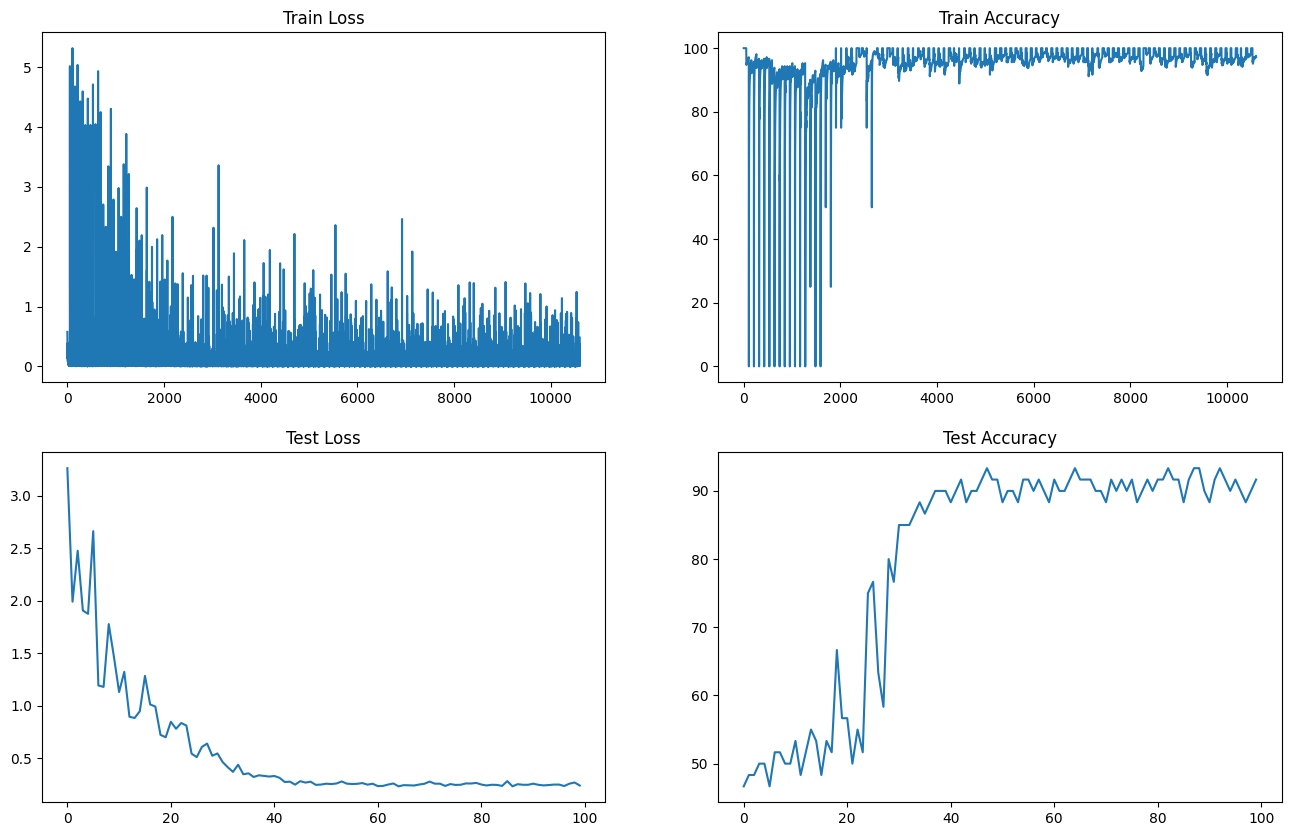

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.title("Test Accuracy")
# plt.plot(test_accuracy)
# plt.show()

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs[0,0].set_title("Train Loss")
axs[0,0].plot([float(i.cpu().detach().numpy()) for i in train_losses])

axs[0,1].set_title("Train Accuracy")
axs[0,1].plot(train_accuracy)

axs[1,0].set_title("Test Loss")
axs[1,0].plot(test_losses)

axs[1,1].set_title("Test Accuracy")
axs[1,1].plot(test_accuracy)

plt.show()
